In [5]:
!pip install python-chess

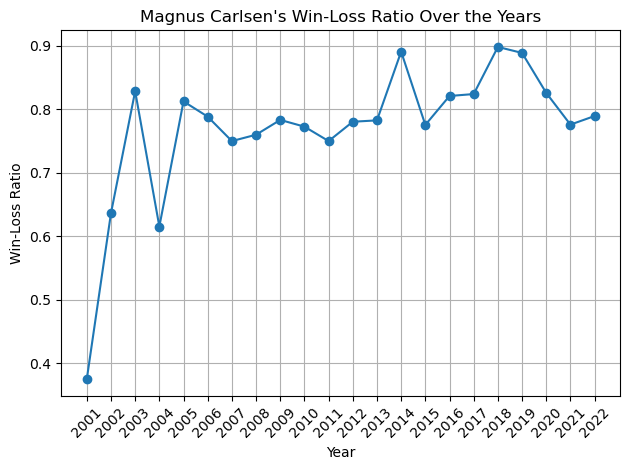

In [25]:
import chess.pgn
import matplotlib.pyplot as plt

def parse_pgn(file_path):
    games = []
    with open(file_path) as pgn_file:
        while True:
            game = chess.pgn.read_game(pgn_file)
            if game is None:
                break
            games.append(game)
    return games

def calculate_win_loss_ratio(games):
    year_wins = {}
    year_losses = {}
    
    for game in games:
        year = game.headers["Date"].split(".")[0]
        result = game.headers["Result"]
        
        if result.startswith("1") and result != "1/2-1/2" and (game.headers["White"] == "Carlsen,Magnus" or game.headers["White"] == "Carlsen,M"):
            year_wins[year] = year_wins.get(year, 0) + 1
        elif result.startswith("0") and (game.headers["White"] == "Carlsen,Magnus" or game.headers["White"] == "Carlsen,M"):
            year_losses[year] = year_losses.get(year, 0) + 1
    
    ratios = {}
    for year in sorted(set(year_wins.keys()) | set(year_losses.keys())):
        wins = year_wins.get(year, 0)
        losses = year_losses.get(year, 0)
        ratio = wins / (wins + losses) if (wins + losses) > 0 else 0
        ratios[year] = ratio
    
    return ratios

def plot_performance(ratios):
    years = list(ratios.keys())
    performance = list(ratios.values())
    
    plt.plot(years, performance, marker='o', linestyle='-')
    plt.title("Magnus Carlsen's Win-Loss Ratio Over the Years")
    plt.xlabel("Year")
    plt.ylabel("Win-Loss Ratio")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    file_path = "Carlsen.pgn"
    games = parse_pgn(file_path)
    ratios = calculate_win_loss_ratio(games)
    plot_performance(ratios)

if __name__ == "__main__":
    main()


In this part of our project, we are going to show how Magnus' winrate progresed over the years. As we can see on graph, he started very low
but in a very short period of time improved a lot. After the year 2005 we can see that he was consistent with around 80% winrate in his games.

This graph can also be used to see if chess works as other sports. Does players performance decreses over time?. And we can see that it's not
the case like in other sports. Magnus has been consistent for around 20 years playing at peek performance. 